In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
features = pd.read_csv('C:/Users/adith/Downloads/python/isot-ner.csv')
list(features.columns)

['Unnamed: 0',
 'TF',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context',
 'Arts, Culture, Entertainment, Sports',
 'Conspiracy',
 'Business and Industrial',
 'economy, business and finance',
 'Religion and belief',
 'Law, Government and Politics',
 'Education',
 'Technology and Computing',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',
 'negemo',
 'social',
 'certain',
 'percept',
 'focuspast',
 'focuspresent',
 'time',
 'PERSON',
 'ORG',
 'GPE',
 'TIME']

In [22]:
df= pd.read_pickle('ISOT-dup.pkl')
list(df.columns)

['index',
 'title',
 'text',
 'subject',
 'date',
 'Label',
 'Clean_text',
 'TF_temp',
 'TF',
 'Bigram TF_temp',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context temp',
 'Out of Context',
 'bigram TF_temp',
 'bigram TF',
 'Textrazor_category',
 'Textrazor_topic',
 'Topics_category',
 'Topics_topic',
 'score_category',
 'score_topic',
 'topic_score_final',
 'topic_list_final',
 'bigram TF final',
 'arts, culture and entertainment',
 'Conspiracy',
 'crime, law and justice',
 'Criticism of journalism',
 'Advertising video on demand',
 'computing and information technology',
 'agriculture',
 'energy and resource',
 'economy, business and finance',
 'Harassment',
 'Cyberspace',
 'religion and belief',
 'Politics and technology',
 'Social media',
 'science and technology',
 'Social epistemology',
 'social issue',
 'environmental issue',
 'Academia',
 'Attacks',
 'Feminism',
 'Sports',
 'Internet-Cyberspace',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',
 'negemo',
 'social',
 '

In [23]:
print(len(df))
print(len(features))

38514
38514


In [24]:
features.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38514 entries, 0 to 38513
Data columns (total 28 columns):
TF                                      38514 non-null int64
Bigram TF                               38514 non-null float64
No. of Stop_words                       38514 non-null float64
Out of Context                          38514 non-null int64
Arts, Culture, Entertainment, Sports    38514 non-null float64
Conspiracy                              38514 non-null float64
Business and Industrial                 38514 non-null float64
economy, business and finance           38514 non-null float64
Religion and belief                     38514 non-null float64
Law, Government and Politics            38514 non-null float64
Education                               38514 non-null float64
Technology and Computing                38514 non-null float64
Science                                 38514 non-null float64
Sixltr                                  38514 non-null float64
conj         

In [26]:
X=features.iloc[:,:].values

In [27]:
#creating the dependant variable y
y= df.loc[:,['Label']]

In [28]:
y=y.iloc[:,0].values

In [29]:
print(type(y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# #splitting our data into train and test, 20% test and 80% train
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
#Stratified split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit( n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 6507 28993 28865 ... 24868 29030   421] TEST: [18704 32302 37764 ...  3934 14509 26864]
TRAIN: [11394 22627 20224 ... 29921 15842 17792] TEST: [14223  9796 16898 ...  6053 29390 21102]
TRAIN: [ 9589 14478 24133 ... 13265 27003 12063] TEST: [26488  2515  9663 ...  6824 21895   619]
TRAIN: [16467 21944 35190 ... 10027 12171 33448] TEST: [ 6261 35469 18874 ... 15829  6569 24084]
TRAIN: [ 2458 35138  6968 ... 30230 32605 21186] TEST: [ 5421  3179 31852 ...  4789  6641 23039]


In [33]:
#Applying feature scaling so that training is faster
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Confusion matrix with Naive Bayes: 
[[ 676 2789]
 [  80 4158]]
Accuracy with Naive Bayes: 
0.6275477086849279
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.6283793554980275
0.004647379876494667


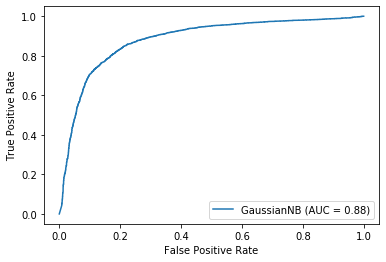

In [34]:
#classifier naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


print("Confusion matrix with Naive Bayes: ")
print(cm)
print("Accuracy with Naive Bayes: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
naive_bayes = metrics.plot_roc_curve(classifier, X_test, y_test)

Confusion matrix with random forests: 
[[3084  381]
 [ 244 3994]]
Accuracy with random forests: 
0.9188627807347787
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.9147709338662935
0.006340559173208381


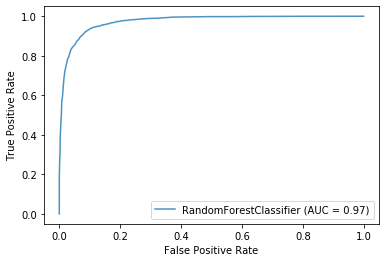

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_features=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with random forests: ")
print(cm)
print("Accuracy with random forests: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())


from sklearn.metrics import plot_roc_curve
ax=plt.gca()
random_forests = metrics.plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.8)

In [38]:
# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'n_estimators': [50, 100,110,90], 'criterion': ['entropy','gini'], 'random_state':[0], 'max_features':['auto', None ]}
#              ]
    
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Accuracy with Grid search :")
# print(best_accuracy)

# print("Best parameters for random forests for best accuracy")
# print(best_parameters)

Accuracy with Grid search :
0.9147709338662935
Best parameters for random forests for best accuracy
{'criterion': 'entropy', 'max_features': None, 'n_estimators': 100, 'random_state': 0}


In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with decision tree: ")
print(cm)
print("Accuracy with decision tree: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
decision_tree = metrics.plot_roc_curve(classifier, X_test, y_test,ax=ax, alpha=0.8)

Confusion matrix with decision tree: 
[[2898  567]
 [ 542 3696]]
Accuracy with decision tree: 
0.8560301181357912
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.8517737715891143
0.005313965609590323


In [41]:
classifier.feature_importances_

array([5.79007765e-02, 1.98185586e-02, 2.93704274e-01, 1.28541871e-01,
       1.67144348e-03, 0.00000000e+00, 2.75666721e-04, 7.91377153e-03,
       2.41833655e-03, 2.89542401e-02, 0.00000000e+00, 3.80222413e-03,
       6.41457127e-04, 7.02702540e-02, 1.56641911e-02, 1.50759154e-02,
       1.92378931e-02, 2.61624079e-02, 2.13504476e-02, 5.76738119e-02,
       2.50068501e-02, 8.41556267e-02, 2.63034437e-02, 2.09909448e-02,
       2.24008929e-02, 1.00600448e-02, 3.61341573e-02, 3.87049883e-03])

Confusion matrix with K Nearest Neighbours: 
[[2807  658]
 [ 242 3996]]
Accuracy with K nearest Neighbours: 
0.8831624042580812
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.8798156775497643
0.00427824513248078


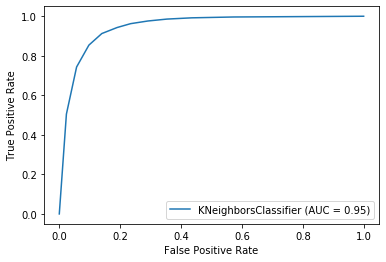

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, p = 1, algorithm='auto')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with K Nearest Neighbours: ")
print(cm)
print("Accuracy with K nearest Neighbours: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
KNN = metrics.plot_roc_curve(classifier, X_test, y_test)

In [45]:
# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'n_neighbors': [5, 15, 10, 25,20], 'p':[1, 2], "algorithm":['auto'] }]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Accuracy with Grid search :")
# print(best_accuracy)

# print("Best parameters for KNN for best accuracy")
# print(best_parameters)

Accuracy with Grid search :
0.8798156775497643
Best parameters for KNN for best accuracy
{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}


Confusion matrix with XGBoost: 
[[3070  395]
 [ 220 4018]]
Accuracy with XGBoost: 
0.9201609762430222
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.9155823060726174
0.00419347834774055


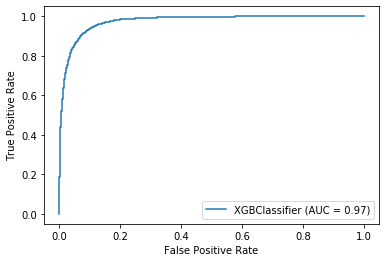

In [49]:
import xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with XGBoost: ")
print(cm)
print("Accuracy with XGBoost: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())


from sklearn import  metrics
XGboost = metrics.plot_roc_curve(classifier, X_test, y_test)

Confusion matrix with kernel SVM: 
[[3136  329]
 [ 217 4021]]
Accuracy with kernel SVM: 
0.9291185252499027
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.9237937255848523
0.005184154208446468


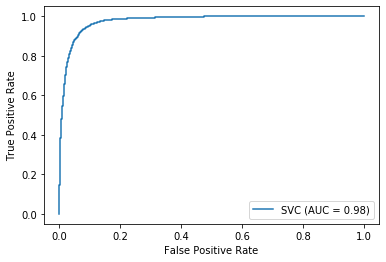

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='auto',C=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with kernel SVM: ")
print(cm)
print("Accuracy with kernel SVM: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
svm = metrics.plot_roc_curve(classifier, X_test, y_test)

In [47]:
# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Accuracy with Grid search :")
# print(best_accuracy)

# print("Best parameters for SVM for best accuracy")
# print(best_parameters)

Accuracy with Grid search :
0.9237937255848523
Best parameters for SVM for best accuracy
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

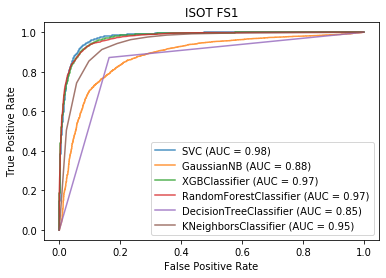

In [51]:
#plotting the graphs
ax=plt.gca()
svm.plot(ax=ax, alpha=0.8)
naive_bayes.plot(ax=ax, alpha=0.8)
XGboost.plot(ax=ax, alpha=0.8)
random_forests.plot(ax=ax, alpha=0.8)
decision_tree.plot(ax=ax, alpha=0.8)
KNN.plot(ax=ax, alpha=0.8)
plt.title('ISOT FS1')
fig = plt.gcf()
fig.savefig('ISOT-FS1.eps',transparent=True, bbox_inches='tight', dpi=400)
plt.show()